# Project (Aprendizagem Automática)

Project done by: <br>
Diogo Araújo - 60997 <br>

In this project, I am aiming to create a Prediction Model, using the data given, to predict three variables: <br>
- Country Population <br>
- Fertility Rate <br>
- Life Expectancy <br>

The model will be fit using three different datasets related to each one of these different variables. The predictions will then be made for different years, such as 2017 and 2018. These predictions will be made for 10 different countries which will be chosen at random from the dataset. <br>

A couple of initial notes, for this project, are that: <br>
- Prededing years must be used to make predictions. <br>
- We can use other data from the world bank to create better models. <br>
- Geographical information can be added. <br> 

## Import Packages

Here I import the necessary packages that will be used in this project. <br>

These are used all along the project, including the data processing and the models themselves. <br>

In [1]:
#Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns

#Import model libraries and other model things
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#Used in evaluation of models
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Used in feature selection
from sklearn.feature_selection import SelectFromModel

## Data Processing (Functions)
Here we will **process the data** to make it usable, and more efficient, in the regression models. <br>

Therefore, I will implement various functions that allow me to do this. This will be better for visualization and also, in case I dont wish to use one of them, I can just comment them. <br>

### Handling Missing Values
In this section, we define several methods of dealing with **missing values** (NaN) in our data. <br>

These consist of the deletion of the rows with missing values, which is what I will use.<br>

### Handling the Dataframes
This section consists of all the functions I used to take care of the data in the dataframes. <br>

This can consist of selecting only the important columns as well as creating a function that creates a large dataframe with the combination of all the deltas of the countries. This is done in accordance to the second method explained by the teacher in the video given. <br>

In [2]:
#Check for missing values (NaN)
def check_missing_values(dataframe):
    #Show amount of missing values
    print("Total amount of missing values: ")
    print(dataframe.isna().sum().sum())

    #Show columns with missing values
    print("Columns with missing values: ")
    print(dataframe.isna().sum())

#Remove rows with missing values (NaN)
def remove_missing_values(dataframe): 
    #Remove all rows where values are missing
    dataframe = dataframe.dropna(axis=0)
    
    #Return dataframe with removed rows
    return dataframe

#Remove columns not used and select only important ones
def select_columns(all_columns):
    #Select the correct columns
    columns_used = ["Country Name"]
    for column in all_columns:
        if column.isnumeric():
            columns_used.append(column)
            
    #Return columns that we will be using
    return columns_used

#Use deltas of each country to predict change between values
#The values of each delta are the subtraction between the current year values with the previous year (increase from year to year)
#This was created with a delta of 5 (6 years chosen for each predictiion)
#This was done based on the second example made in the video by the teacher (thank you teacher)
def create_dataframe(dataframe):
    #Create initial dataframe
    df_col = ["Country Name", "Delta 0", "Delta 1", "Delta 2", "Delta 3", "Delta 4", "Value to Predict"]
    results = pd.DataFrame(columns = df_col)
    
    #Insert data from all countries into dataframe
    size = len(dataframe)
    for pos in range(0, size):
        #Get data from country
        country_values = dataframe.iloc[pos]     
        
        #Insert data into dataframe
        count = 2
        while True:
            #Leave loop when all values have been inserted
            if count + 5 >= country_values.size:
                break
            
            #Insert delta values into dataframe
            insert_row = [country_values[0], 
                          country_values[count] - country_values[count - 1],
                          country_values[count + 1] - country_values[count],
                          country_values[count + 2] - country_values[count + 1],
                          country_values[count + 3] - country_values[count + 2],
                          country_values[count + 4] - country_values[count + 3],
                          country_values[count + 5] - country_values[count + 4]]
            results.loc[len(results)] = insert_row
            
            #Move onto next position
            count = count + 1
        
    #Return combined dataframe
    return results

## Data Processing (Execution)
Here I will be executing all the functions previously defined so that the data may be processed and used in the models. <br>

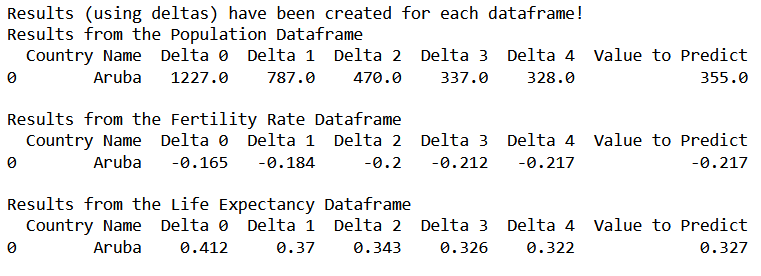

In [3]:
#Get training dataframes from .csv file
df_pop = pd.read_csv("../country_population.csv")
df_fert = pd.read_csv("../fertility_rate.csv")
df_life = pd.read_csv("../life_expectancy.csv")

#Get comparison dataframes for comparison
df_pop_comp = pd.read_csv("../country_population_comparison.csv")
df_fert_comp = pd.read_csv("../fertility_rate_comparison.csv")
df_life_comp = pd.read_csv("../life_expectancy_comparison.csv")

#Obtain dataframe columns which we will use
columns_used = select_columns(np.asarray(df_pop.columns))

#Recreate dataframes based on selected columns
df_pop = df_pop[columns_used]
df_fert = df_fert[columns_used]
df_life = df_life[columns_used]

#Remove missing values from dataframes (removes some countries, but is a necessary sacrifice)
df_pop = remove_missing_values(df_pop)
df_fert = remove_missing_values(df_fert)
df_life = remove_missing_values(df_life)

#Check for missing values
#check_missing_values(df_pop)
#check_missing_values(df_fert)
#check_missing_values(df_life)

#Create results dataframe for each prediction
results_df_pop = create_dataframe(df_pop)
results_df_fert = create_dataframe(df_fert)
results_df_life = create_dataframe(df_life)

#Combine all result dataframes into one list
delta_results = [results_df_pop, results_df_fert, results_df_life]

#Print out results
print("Results (using deltas) have been created for each dataframe!")
pos = 0
for dataframe in delta_results:
    #Print out current dataframe name
    if pos == 0:
        print("Results from the Population Dataframe")
    elif pos == 1:
         print("Results from the Fertility Rate Dataframe")
    else:
         print("Results from the Life Expectancy Dataframe")
    print(dataframe.head(1))
    print()
    pos = pos + 1

Results (using deltas) have been created for each dataframe!
Results from the Population Dataframe
  Country Name  Delta 0  Delta 1  Delta 2  Delta 3  Delta 4  Value to Predict
0        Aruba   1227.0    787.0    470.0    337.0    328.0             355.0

Results from the Fertility Rate Dataframe
  Country Name  Delta 0  Delta 1  Delta 2  Delta 3  Delta 4  Value to Predict
0        Aruba   -0.165   -0.184     -0.2   -0.212   -0.217            -0.217

Results from the Life Expectancy Dataframe
  Country Name  Delta 0  Delta 1  Delta 2  Delta 3  Delta 4  Value to Predict
0        Aruba    0.412     0.37    0.343    0.326    0.322             0.327



## Models Selected (Functions)
Here I will define our models via functions. These will also be accompanied by an explanation of how the model works and what it aims to achieve. The hyperparameters of these models were decided manually and not too extensively by changing each parameter and checking its changes. <br>

I also created some plotting functions so that the data could be visualized better. <br>

### Evaluating the Regression Models
Here we are storing our method of evaluating the regression models. This is done via the evaluation metrics described below and will be used during this project to compare each of the models. <br>

The <b>R^2</b> tells us how much the predicted data explains the actual data. In other words, it represents the strength of the fit. However, it does not say anything about the model itself — it does not tell you if the model is good, whether the data you’ve chosen is biased, or even if you’ve chosen the correct modelling method. <br>

It ranges from 0 to 1, with higher values denoting a strong fit, and lower values denoting a weak fit. Anything below 0.5 is a bad fit, while anything above 0.8 is a good fit. <br>

The <b>MAE</b> (Mean Absolute Error) is the sum of all the error magnitudes divided by the number of points, so essentially the average error. Therefore, the lower the MAE, the less error in your model. <br>

The <b>MSE</b> (Mean Squared Error) is the sum of the squares of all errors divided by the number of points. Note that, since in each instance the error is actually squared, it cannot be directly compared to the MAE, because it will always be of a higher order. Thus, as with MAE, the lower the MSE, the less error in the model. <br>

### Linear Regression
Linear regression analysis is used to predict the value of a variable based on the value of another variable. <br>

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. It then fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. <br>

### K-Nearest Neighbors
K-Nearest Neighbors is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. <br>

### Random Forest
Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. <br>

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. <br>

### Compare Metrics of Models
So that we are able to compare all the models, at the same time, I used subplots to represent their R2 scores. <br>

In [4]:
#Show a print out of various methods of evaluating a classification model
def evaluate_model(model, test_y, preds):
    #print("------------------------------------------------------------")
    #print("Model being tested is:", model)
    
    #Get evaluation metrics
    mae =  mean_absolute_error(test_y, preds)
    mse = mean_squared_error(test_y, preds)
    r2 = r2_score(test_y, preds)

    #Print out the evaluation methods
    #print("The MAE of the model is:", mae)
    #print("The MSE of the model is: ", mse)
    #print("The R2 of the model is: ", r2)
    #print()

    #Return r2 score as evaluation
    return r2

#Define the linear regression model
def linear_regression(train_x, train_y, test_x, test_y):
    #Define the model and fit it with training data
    model = LinearRegression()
    model.fit(train_x, np.ravel(train_y))
    
    #Create predictions according to test data
    predictions = model.predict(test_x)
    
    #Use evaluation methods to evaluate model and return model
    return (evaluate_model("Linear Regression", test_y, predictions), model)

#Define the k-nearest neighbors model
def k_nearest_neighbors(train_x, train_y, test_x, test_y):
    #Create the model and fit with training data
    model = KNeighborsRegressor(n_neighbors=3, weights="distance")
    model.fit(train_x, np.ravel(train_y))
    
    #Create predictions according to test data
    predictions = model.predict(test_x)
    
    #Use evaluation methods to evaluate model and return model
    return (evaluate_model("K-Nearest Neighbors", test_y, predictions), model)

#Define the random forest model
def random_forest(train_x, train_y, test_x, test_y):
    #Create the model and fit with training data
    model =  RandomForestRegressor(n_estimators = 100, random_state=20)
    model.fit(train_x, np.ravel(train_y))
    
    #Create predictions according to test data
    predictions = model.predict(test_x)
    
    #Use evaluation methods to evaluate model and return model
    return (evaluate_model("Random Forest", test_y, predictions), model)

#Compare all R2 score results using bar plot
def compare_r2_scores(results):
    #Define different plots by matrix
    fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 5))
    
    #Define the title of the full figure
    fig.suptitle("Model R2 Scores for each Dataframe")
    
    #Define the x and y axis we will be using
    x = ["LR", "KNN","RF"]
    plt.xticks([0, 1, 2], x)
    
    #Plot 0,0
    y = [results[0][0], results[0][1], results[0][2]]
    axs[0].plot(y)
    axs[0].set_title("Country Population Dataframe")
    
    #Plot 1
    y = [results[1][0], results[1][1], results[1][2]]
    axs[1].plot(y)
    axs[1].set_title("Fertility Rate Dataframe")
    
    #Plot 2
    y = [results[2][0], results[2][1], results[2][2]]
    axs[2].plot(y)
    axs[2].set_title("Life Expectancy Dataframe")

## Models Selected (Execution)
In this section, we will execute the code in which our models will be contained. These models are the ones we will be comparing / using for the evaluation of the dataframes. <br>

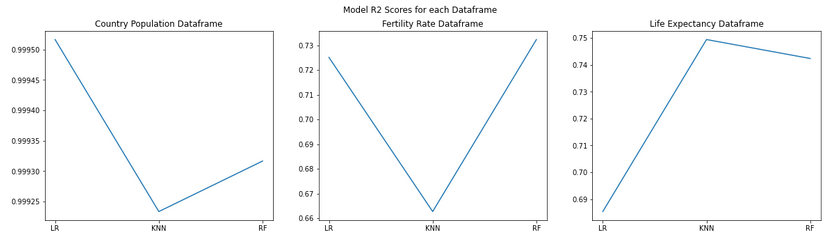

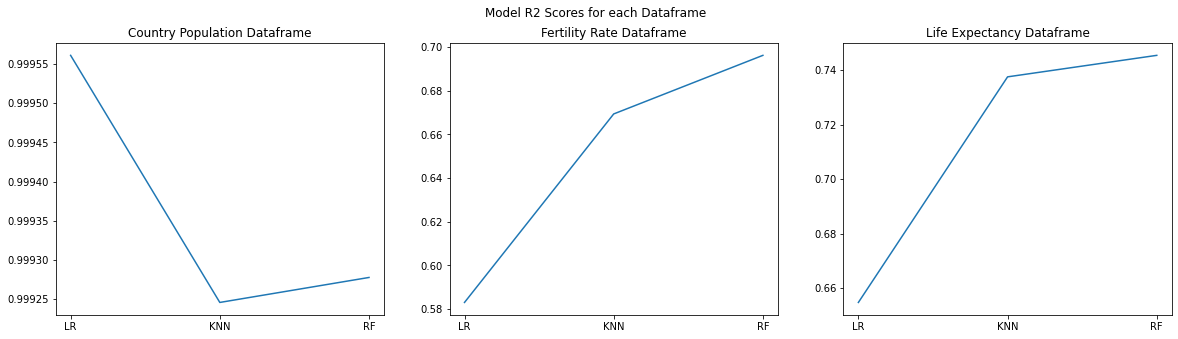

In [5]:
#Save models which we will be using later for year 2017 predictions
final_lin = None
final_k = None
final_ran = None

#Go through each dataframe and test each model on them (look for best model for each dataframe)
all_res = list()
pos = 0
for dataframe in delta_results: 
    #Load data into columns
    x = dataframe.drop(columns=["Country Name", "Value to Predict"])
    y = dataframe[["Value to Predict"]]

    #Load training and testing set
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25)

    #Execute Linear Regression model
    lin_res, lin_model = linear_regression(train_x, train_y, test_x, test_y)

    #Execute K-Nearest Neighbors model
    k_res, k_model = k_nearest_neighbors(train_x, train_y, test_x, test_y)

    #Execute Random Forest model
    ran_res, ran_model = random_forest(train_x, train_y, test_x, test_y)

    #Aggregate all results of models
    all_res.append([lin_res, k_res, ran_res])
    
    #Save models which we will be using (can be done after knowing which ones are best)
    if pos == 0:
        final_lin = lin_model
    elif pos == 1:
        final_ran = ran_model
    elif pos == 2:
        final_k = k_model

    #Increment position
    pos = pos + 1

#Compare all R2 score results using bar plot
compare_r2_scores(all_res)

## Model Results (Functions)
Here we will define the functions that allow us to make the predictions and compare with the actual results taken from the World Data Bank. The models that will be used in this section were obtained / selected in the previous section. <br>

### Handling Predictions
Several functions created to help with handling the predictions made by the model. This includes the creation of those predictions as well as the comparison with the actual values. <br>

### Choosing Countries for Testing
As was stated previously, we will only be doing the comparison (of the predictions) for 10 random countries. As such, I created a function that chose those 10 random countries and saved them in a list to be used later. <br>

In [6]:
#Use model to predict values based on x (which is the calculation of the delta values of the last 5 years)
#Delta values are the increase from one year to the next
def predict_values(model, res_df):
    #Get data from dataframe
    initial_df = res_df.drop(columns=["Country Name", "Actual 2017"])
    
    #Transform initial values to delta values
    delta_values = list()
    for pos in range(0, 10):
        #Get country values
        country_values = initial_df.iloc[pos]
        
        #Insert delta values into dataframe
        delta_result = [country_values[1] - country_values[0], #2012 - 2011 (delta 0)
                      country_values[2] - country_values[1], #2013 - 2012 (delta 1)
                      country_values[3] - country_values[2], #2014 - 2013 (delta 2)
                      country_values[4] - country_values[3], #2015 - 2014 (delta 3)
                       country_values[5] - country_values[4]] #2016 - 2015 (delta 4)
        
        #Insert result into list
        delta_values.append(delta_result)
    
    #Create x dataframe based on delta values
    df_col = ["Delta 0", "Delta 1", "Delta 2", "Delta 3", "Delta 4"]
    x = pd.DataFrame(columns = df_col)
    
    #Insert delta values into dataframe
    for delta in delta_values:
        x.loc[len(x)] = delta
    
    #Predict values with model and x
    preds_delta = model.predict(x) #2017 - 2016 => ?
    
    #Since this is but delta, sum predictions to year 2016
    y_2016 = res_df[["2016"]]
    for pos in range(0, 10):
        preds_2017 = y_2016.iloc[pos][0] + preds_delta[pos]
    
        #Insert predictions into dataframe
        res_df.loc[pos, "Predicted 2017"] = preds_2017
    
    #Return dataframe with predicted values
    return res_df

#Create a large dataframe that will be used to house predictions and their actual values (taken from year 2017)
def create_predictions_dataframe(countries, df_pred, df_comp):
    #Create initial dataframes
    df_col = ["Country Name", "2011", "2012", "2013", "2014", "2015", "2016", "Actual 2017"]
    results = pd.DataFrame(columns = df_col)
    
    #Get respective data for all countries in all dataframes
    for country in countries:
        #Get values of country for dataframes
        values_pred = df_pred.loc[df_pred["Country Name"] == country].iloc[0]
        value_comp = df_comp[df_comp["Country Name"] == country].iloc[0]
        
        #Combine all values into a row
        insert_row = [values_pred[0], #country
                          values_pred[-6], #2011
                          values_pred[-5], #2012
                          values_pred[-4], #2013
                          values_pred[-3], #2014
                          values_pred[-2], #2015
                          values_pred[-1], #2016
                     value_comp[1]] #actual 2017

        #Insert data into dataframe
        results.loc[len(results)] = insert_row

    #Return results dataframe
    return results

#Select 10 random numbers which will, in turn, select countries used
def select_countries(dataframe):
    #Create initial lists
    positions = list()
    countries = list()
    
    #Get 10 random numbers based on dataframe size
    size = len(dataframe)
    for pos in range(0, 10):
        positions.append(random.randrange(len(dataframe)))

    #Get countries associated with those numbers
    for pos in positions:
        countries.append(dataframe["Country Name"].iloc[pos])
        
    #Print list of countries
    print("Countries selected for Testing:")
    print(countries)
    print()
    
    #Return list of countries
    return countries

## Model Results (Execution)
Having now selected which models are the best for the dataframes, all I had to do was use those models to predict the values (for each dataframe) for the year 2017. These will then be compared with the values taken from the World Data Bank. <br>

The predictions for the year 2018 were planned to be done, however due to difficulties only the predictions for the year 2017 were done. <br>

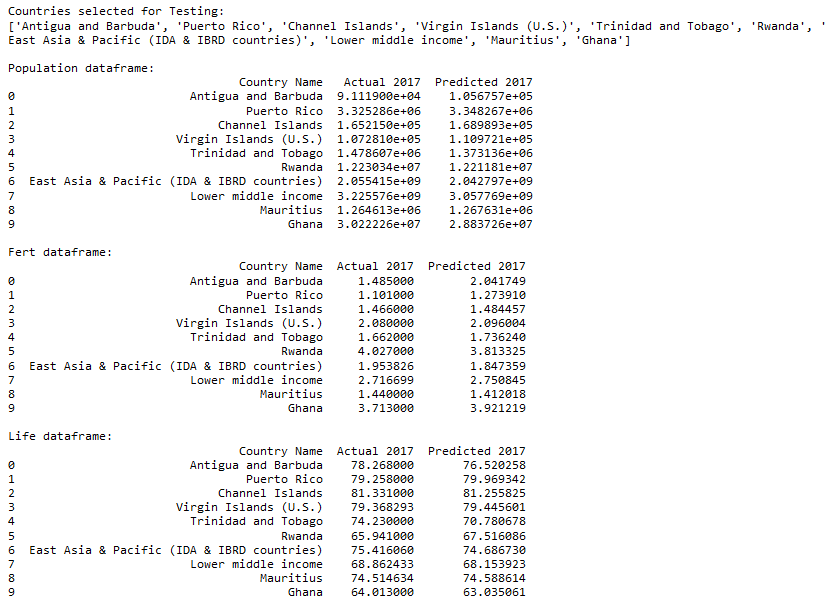

In [7]:
#Get 10 random countries that will be used for prediction
countries = select_countries(df_fert)

#Create dataframes with all necessary info for predictions 
res_pop = create_predictions_dataframe(countries, df_pop, df_pop_comp)
res_fert = create_predictions_dataframe(countries, df_fert, df_fert_comp)
res_life = create_predictions_dataframe(countries, df_life, df_life_comp)

#Use best model for population to predict year 2017
res_pop = predict_values(final_lin, res_pop)
res_fert = predict_values(final_ran, res_fert)
res_life = predict_values(final_k, res_life)

print("Population dataframe:")
print(res_pop[["Country Name", "Actual 2017", "Predicted 2017"]])
print()

print("Fert dataframe:")
print(res_fert[["Country Name", "Actual 2017", "Predicted 2017"]])
print()

print("Life dataframe:")
print(res_life[["Country Name", "Actual 2017", "Predicted 2017"]])
print()

Countries selected for Testing:
['Latin America & Caribbean', 'Timor-Leste', 'Europe & Central Asia (IDA & IBRD countries)', 'Ethiopia', 'Niger', 'Angola', 'New Caledonia', 'Hungary', 'Bangladesh', 'Other small states']

Population dataframe:
                                   Country Name  Actual 2017  Predicted 2017
0                     Latin America & Caribbean  633797190.0    6.442036e+08
1                                   Timor-Leste    1243235.0    1.299664e+06
2  Europe & Central Asia (IDA & IBRD countries)  458170561.0    4.577737e+08
3                                      Ethiopia  108197950.0    1.049532e+08
4                                         Niger   21737922.0    2.146912e+07
5                                        Angola   30208628.0    2.978116e+07
6                                 New Caledonia     270810.0    2.859237e+05
7                                       Hungary    9787966.0    9.785727e+06
8                                    Bangladesh  161793964.0    

## Discussion and Conclusions
The predictions obtained by the models are similar to those observed in the world bank. However, not all of them accurately reflect their actual value therefore the models are not as good as they could be. It still functions fairly well and, although only tested for 2017, could most likely accurately represent other years past that (although it could use some extra information associated with the country). <br>

(As a side note, the delta dataframes were created based on the second example given by the teacher in the project video, whose support is greatly appreciated) <br>